# Tensorflow load dataset

In [1]:
from  tensorflow.keras.utils import image_dataset_from_directory

In [2]:
images_train, images_test = image_dataset_from_directory(
                                                    directory = '../data/cropped_dataset/',
                                                    labels = 'inferred',
                                                    label_mode='categorical',
     class_names=['Angela','Dwight','Jim','Kevin','Michael','Pam'],
                                                    image_size = (50,50),
                                                    seed = 42,
                                                    validation_split = 0.2,
                                                    subset = 'both',
                                                    interpolation = 'bicubic',
                                                    crop_to_aspect_ratio = True)

Found 1166 files belonging to 6 classes.
Using 933 files for training.
Using 233 files for validation.


# images output

In [3]:
import matplotlib.pyplot as plt

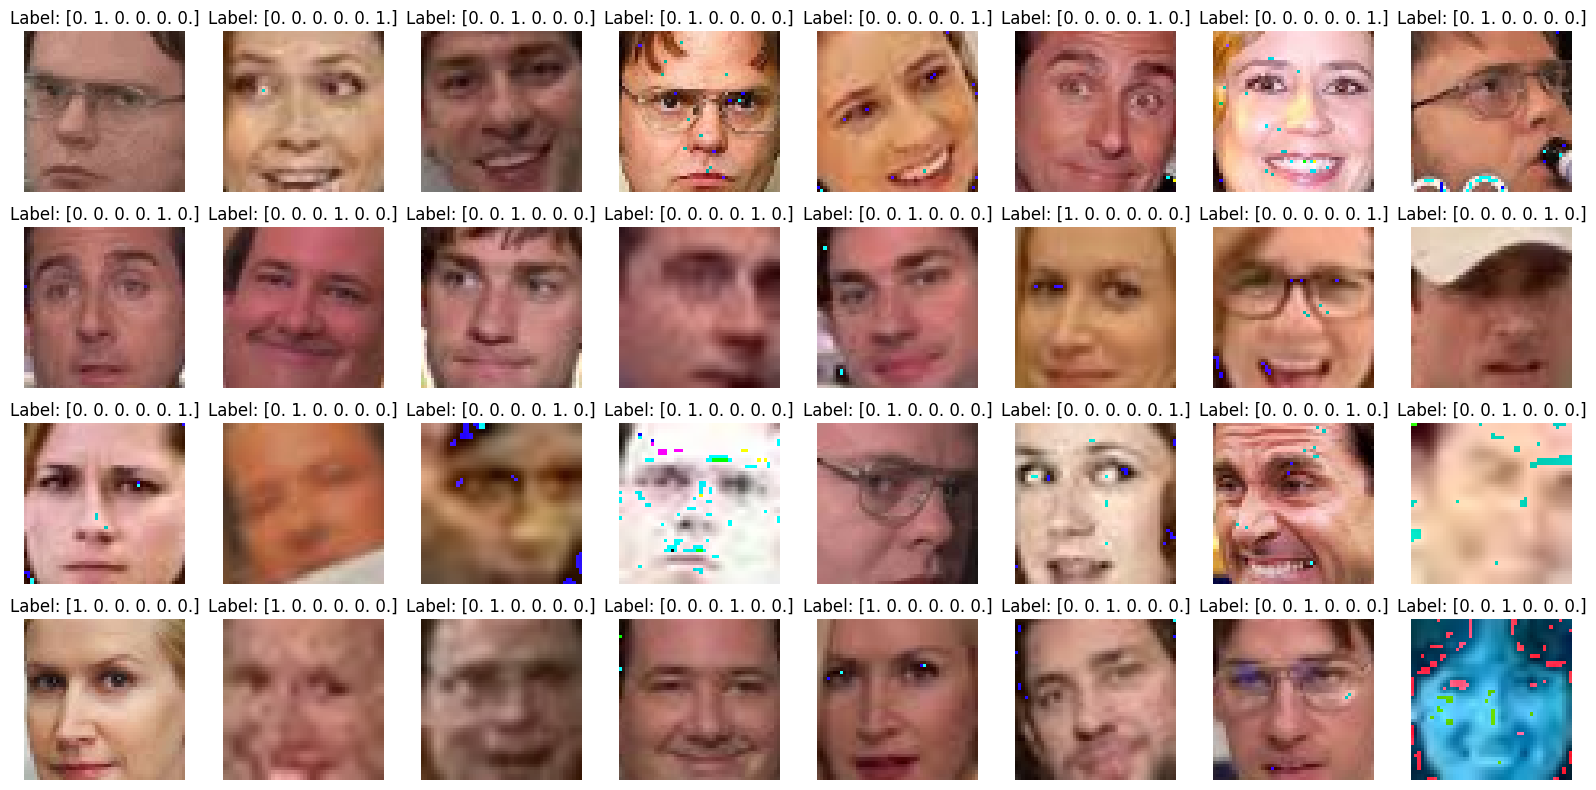

In [4]:
# Get one batch of images and labels
for images, labels in images_train.take(1):
    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
        ax.set_title(f'Label: {labels[i]}')
    plt.tight_layout()
    plt.show()

# Base-model

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19

In [7]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained VGG16 model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(130, activation='relu'),
    Dense(6, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 130)               33410     
                                                                 
 dense_2 (Dense)             (None, 6)                 786       
                                                                 
Total params: 20,189,908
Trainable params: 165,524
Non-t

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']
             )

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',patience = 2,restore_best_weights=True)

In [11]:
history = model.fit(images_train,
                  epochs = 100,batch_size=32,
               verbose=1, validation_data=images_test,
               callbacks = [es]
              )

Epoch 1/100
30/30 [==============================] - 143s 5s/step - loss: 11.2716 - accuracy: 0.2733 - val_loss: 3.1285 - val_accuracy: 0.4292
Epoch 2/100
30/30 [==============================] - 87s 3s/step - loss: 4.4222 - accuracy: 0.4373 - val_loss: 1.6861 - val_accuracy: 0.5408
Epoch 3/100
30/30 [==============================] - 43s 1s/step - loss: 2.5816 - accuracy: 0.5177 - val_loss: 1.4350 - val_accuracy: 0.5579
Epoch 4/100
30/30 [==============================] - 73s 2s/step - loss: 2.1074 - accuracy: 0.5584 - val_loss: 1.1876 - val_accuracy: 0.6395
Epoch 5/100
30/30 [==============================] - 52s 2s/step - loss: 1.7109 - accuracy: 0.5863 - val_loss: 1.2270 - val_accuracy: 0.6052
Epoch 6/100
30/30 [==============================] - 37s 1s/step - loss: 1.2847 - accuracy: 0.6377 - val_loss: 1.2626 - val_accuracy: 0.6094


In [ ]:
# %tensorboard --logdir logs/fit

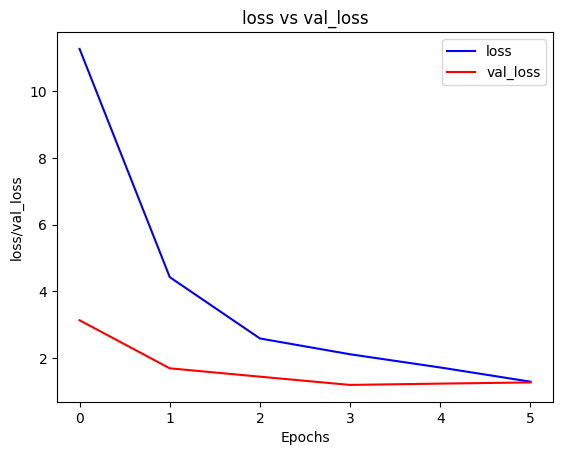

In [12]:
plt.plot(model.history.history['loss'],color='b',label='loss')
plt.plot(model.history.history['val_loss'],color='r',label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss/val_loss')
plt.title('loss vs val_loss')
plt.show()

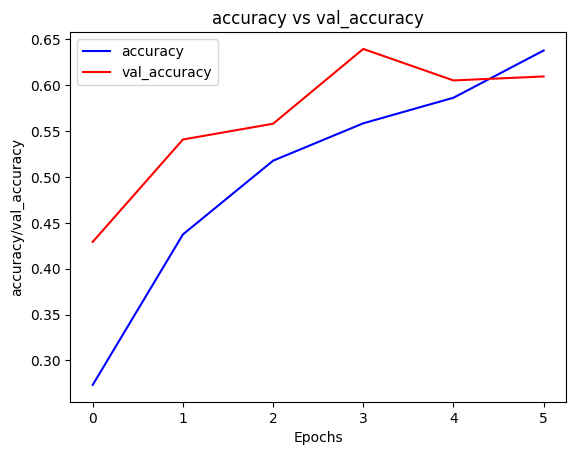

In [13]:
plt.plot(model.history.history['accuracy'],color='b',label = 'accuracy')
plt.plot(model.history.history['val_accuracy'],color='r',label = 'val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy/val_accuracy')
plt.title('accuracy vs val_accuracy')
plt.show()

# evaluate

In [2]:
images_test_main = image_dataset_from_directory(
                                                   directory = '../raw_data/cast/',
                                                    labels = None,label_mode=None,
                                                    image_size = (50,50),
                                                    seed = 42,
                                                    interpolation = 'bicubic',
                                                    crop_to_aspect_ratio = True)

NameError: name 'image_dataset_from_directory' is not defined

In [1]:
for images in images_test_main.take(1):
    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
#         ax.set_title(f'Label: {labels[i]}')
    plt.tight_layout()
    plt.show()

NameError: name 'images_test_main' is not defined

In [19]:
model.evaluate(images_test
              )

8/8 [==============================] - 8s 990ms/step - loss: 1.1876 - accuracy: 0.6395


[1.1875711679458618, 0.6394850015640259]

In [16]:
result = model.predict(images_test_main)

1/1 [==============================] - 7s 7s/step


In [17]:
result.shape

(28, 6)

In [18]:
import numpy as np
lables = np.argmax(result,axis=1)
lables 

array([0, 4, 1, 3, 1, 1, 0, 4, 5, 2, 3, 1, 1, 2, 4, 2, 0, 5, 4, 3, 1, 2,
       0, 4, 4, 0, 4, 5])

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 28 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

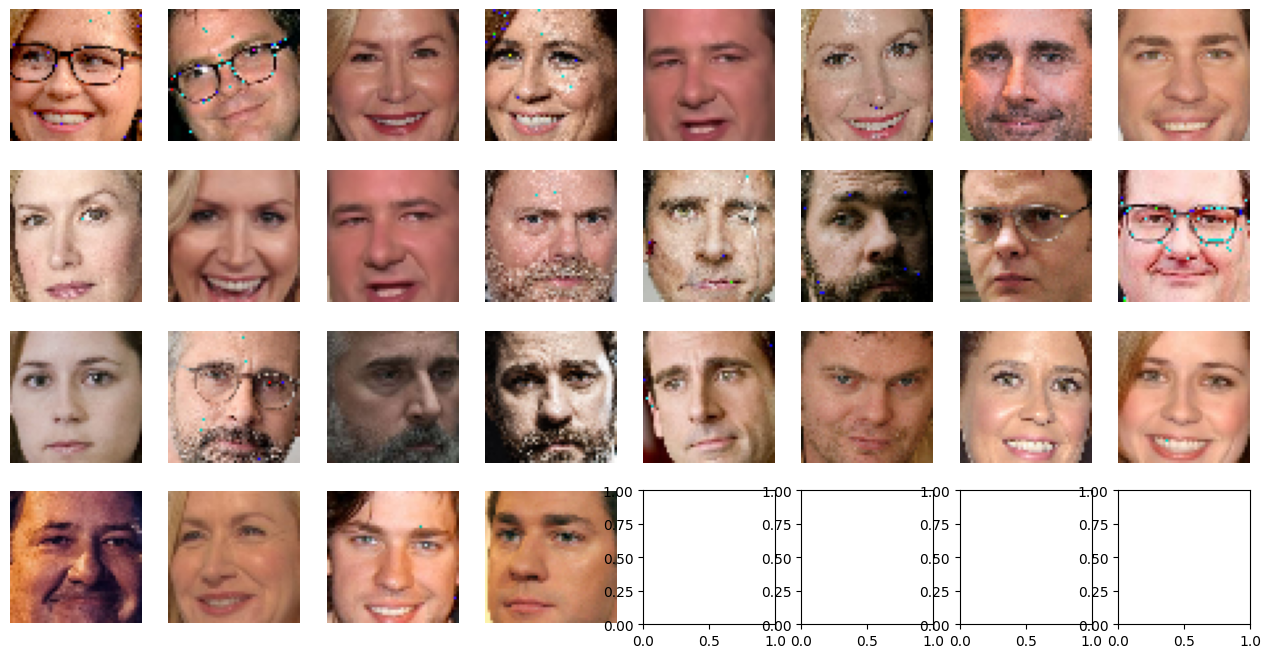

In [21]:
for images in images_test_main.take(1):
    # Plot the images
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis('off')
#         ax.set_title(f'Label: {labels[i]}')
    plt.tight_layout()
    plt.show()